# 제 19대 대통령 선거 분석 및 시각화


### 요약
- 본 분석은 19대 대통령 선거투표 데이터로 광역시별, 시군별, 투표인구, 대선 득표 Top3 후보의 득표만으로 컬럼이 이루어져 있다.
- 투표율이 가장 많은 광역시도는 경기도, 서울특별시, 부산광역시, 경상남도 순이다. 
- 투표율이 가장 많은 시군은 경기도 부천시, 서울특별시 강서구, 서울특별시 송파구, 경기도 남양주시, 경기도 화성시 순이다.
- 대선 후보 출생지별 득표로 문후보와 홍후보는 출생지에서 많은 득표를 가져갔지만 안후보는 그렇지 않았다.
- 문후보의 서울 득표는 송파구, 강서구, 관악구 순으로 많았고 중구, 종로구, 용산구 순으로 낮았다.
- 홍후보의 서울 득표는 송파구, 강남구, 강서구 순으로 많았고 중구, 종로구, 금천구 순으로 낮았다.


### 결론
- 대선후보의 선거 유세는 전략적으로 득표율이 높은 경기도(24.10%), 서울특별시(20.10%)에서 행해진다.
- 각 후보의 출생지에서 꼭 높은 득표를 가져가는 것은 아니다.
- 서울내에서 투표율이 높은 자치구는 송파구, 강서구이며 중구, 종로구는 투표율이 저조하다.
- 투표인구와 지역만으로 분석하였으므로 정확한 분석을 위한 정치적 성향과 공략등의 다양한 변수로 머신러닝을 통한 투표율 예측이 가능할 것 같다.

In [87]:
# Module 불러오기 / nbagg
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [88]:
# Data 불러오기
election = pd.read_csv('./Data/election_result_mac.csv', index_col='Unnamed: 0')
election.head()

,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566,42512,22325,22313
1,서울특별시,중구,82852,34062,17901,19372
2,서울특별시,용산구,148157,58081,35230,32109
3,서울특별시,성동구,203175,86686,40566,45674
4,서울특별시,광진구,240030,105512,46368,52824


In [89]:
# 기본 통계량 확인하기
election.describe()

,pop,moon,hong,ahn
count,250.000000,250.000000,250.000000,250.000000
mean,131231.632000,53695.200000,31411.396000,27993.368000
std,103661.018016,46502.870099,26962.533585,23516.645428
min,6810.000000,1443.000000,471.000000,973.000000
25%,38779.250000,13506.750000,9640.500000,9110.500000
50%,108205.500000,41153.000000,26236.500000,21219.000000
75%,204097.000000,83561.250000,46545.250000,43609.500000
max,543777.000000,239697.000000,165781.000000,128297.000000


In [90]:
# 컬럼명 확인하기
election.columns

Index(['광역시도', '시군', 'pop', 'moon', 'hong', 'ahn'], dtype='object')

In [91]:
# Dimension
election.shape

(250, 6)

In [92]:
# 컬럼별 자료형 확인
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    250 non-null    object
 1   시군      250 non-null    object
 2   pop     250 non-null    int64 
 3   moon    250 non-null    int64 
 4   hong    250 non-null    int64 
 5   ahn     250 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 13.7+ KB


In [93]:
election.isnull().any()     # any : 이중 하나라도 다르면 바뀜

광역시도    False
시군      False
pop     False
moon    False
hong    False
ahn     False
dtype: bool

In [94]:
# electionSum = moon + hong + ahn
# election에 컬럼 추가하기
election['electionSum'] = election.moon + election.hong + election.ahn
election.head()

,광역시도,시군,pop,moon,hong,ahn,electionSum
0,서울특별시,종로구,102566,42512,22325,22313,87150
1,서울특별시,중구,82852,34062,17901,19372,71335
2,서울특별시,용산구,148157,58081,35230,32109,125420
3,서울특별시,성동구,203175,86686,40566,45674,172926
4,서울특별시,광진구,240030,105512,46368,52824,204704


In [95]:
# electionRatio 컬럼 추가하기
election['electionRatio'] = round((election['electionSum'] / election['pop'])*100,2)
election

,광역시도,시군,pop,moon,hong,ahn,electionSum,electionRatio
0,서울특별시,종로구,102566,42512,22325,22313,87150,84.97
1,서울특별시,중구,82852,34062,17901,19372,71335,86.10
2,서울특별시,용산구,148157,58081,35230,32109,125420,84.65
3,서울특별시,성동구,203175,86686,40566,45674,172926,85.11
4,서울특별시,광진구,240030,105512,46368,52824,204704,85.28
...,...,...,...,...,...,...,...,...
245,경상남도,산청군,24513,6561,12544,2753,21858,89.17
246,경상남도,거창군,41325,11256,19976,4923,36155,87.49
247,경상남도,합천군,33021,7143,19699,3077,29919,90.61
248,제주특별자치도,제주시,273163,125717,48027,55971,229715,84.09


In [96]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

## 광역시도별 그룹핑

In [97]:
election_region = election.groupby('광역시도').sum()
election_region

,pop,moon,hong,ahn,electionSum,electionRatio
광역시도,,,,,,
강원도,955885,324768,284909,206840,816517,1541.83
경기도,7916009,3319812,1637345,1807308,6764465,3593.95
경상남도,2135055,779731,790491,284272,1854494,1929.12
경상북도,1711627,369726,827237,253905,1450868,2073.86
광주광역시,957321,583847,14882,287222,885951,463.41
대구광역시,1581347,342620,714205,235757,1292582,657.97
대전광역시,945897,404545,191376,218769,814690,431.44
부산광역시,2261633,872127,720484,378907,1971518,1397.66
서울특별시,6590646,2781345,1365285,1492767,5639397,2140.52


### 투표율 계산이므로 광역시별 투표율 / 전국 투표율을 나누어 계산

In [98]:
# 소수점 둘째자리까지 반올림 한다.
election_region['Vote_Ratio'] = round((election_region['pop'] / election_region['pop'].sum())*100,1)
election_region

,pop,moon,hong,ahn,electionSum,electionRatio,Vote_Ratio
광역시도,,,,,,,
강원도,955885,324768,284909,206840,816517,1541.83,2.9
경기도,7916009,3319812,1637345,1807308,6764465,3593.95,24.1
경상남도,2135055,779731,790491,284272,1854494,1929.12,6.5
경상북도,1711627,369726,827237,253905,1450868,2073.86,5.2
광주광역시,957321,583847,14882,287222,885951,463.41,2.9
대구광역시,1581347,342620,714205,235757,1292582,657.97,4.8
대전광역시,945897,404545,191376,218769,814690,431.44,2.9
부산광역시,2261633,872127,720484,378907,1971518,1397.66,6.9
서울특별시,6590646,2781345,1365285,1492767,5639397,2140.52,20.1


In [99]:
# 시각화를 위해 내림차순 정렬
election_region = election_region.sort_values(by='Vote_Ratio', ascending=False)
election_region

,pop,moon,hong,ahn,electionSum,electionRatio,Vote_Ratio
광역시도,,,,,,,
경기도,7916009,3319812,1637345,1807308,6764465,3593.95,24.1
서울특별시,6590646,2781345,1365285,1492767,5639397,2140.52,20.1
부산광역시,2261633,872127,720484,378907,1971518,1397.66,6.9
경상남도,2135055,779731,790491,284272,1854494,1929.12,6.5
인천광역시,1820091,747090,379191,428888,1555169,859.00,5.5
경상북도,1711627,369726,827237,253905,1450868,2073.86,5.2
대구광역시,1581347,342620,714205,235757,1292582,657.97,4.8
충청남도,1240204,476661,306614,290216,1073491,1398.61,3.8
전라남도,1238738,737921,30221,378179,1146321,2040.61,3.8


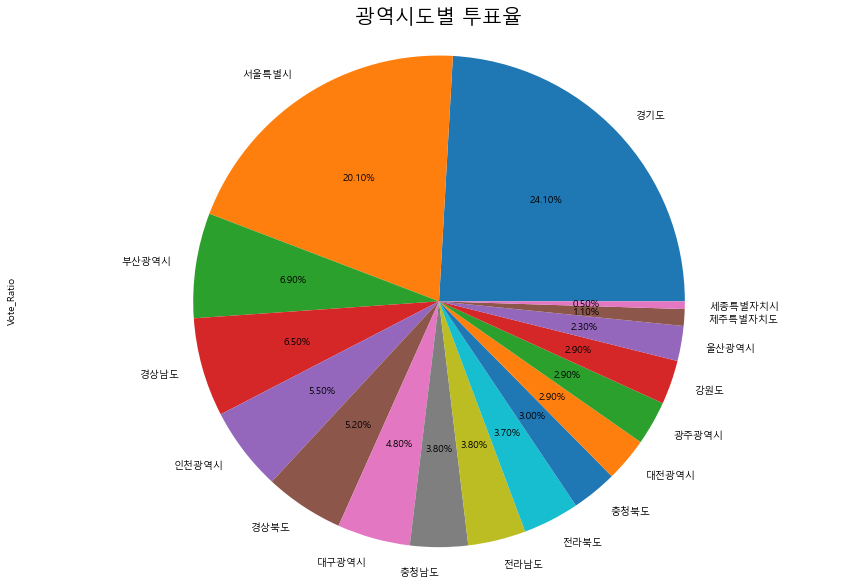

In [100]:
# 파이차트 그리기 
election_region['Vote_Ratio'].plot(
    kind = 'pie',
    figsize = (15,10),
    autopct = '%.2f%%', # 자동 퍼센트 값을 주도록 함
    startangle = 0,   # 시작하는 값을 줄 수 있음
)
plt.title('광역시도별 투표율', size = 20)
plt.axis('equal') # 파이차트의 모양을 원에 가깝게 조정

plt.show()

In [101]:
# Pivot을 이용하여 광역시별 pop의 합계로 그룹화하여 집계한다.   - 2번 방법
elec_sum = election.pivot_table('pop', index='광역시도', aggfunc=sum)
elec_sum

,pop
광역시도,
강원도,955885
경기도,7916009
경상남도,2135055
경상북도,1711627
광주광역시,957321
대구광역시,1581347
대전광역시,945897
부산광역시,2261633
서울특별시,6590646


In [102]:
# pop별 순차를 내림차순으로 정렬
elec_sum_order = elec_sum.sort_values(by='pop', ascending=False)
elec_sum_order

,pop
광역시도,
경기도,7916009
서울특별시,6590646
부산광역시,2261633
경상남도,2135055
인천광역시,1820091
경상북도,1711627
대구광역시,1581347
충청남도,1240204
전라남도,1238738


In [103]:
# 경기도, 서울특별시, 인천광역시의 투표 인구수가 전체의 몇퍼센트?
print(round(elec_sum_order['pop'][[0,1,4]].sum() / elec_sum_order['pop'].sum() * 100, 2), '%')

49.76 %


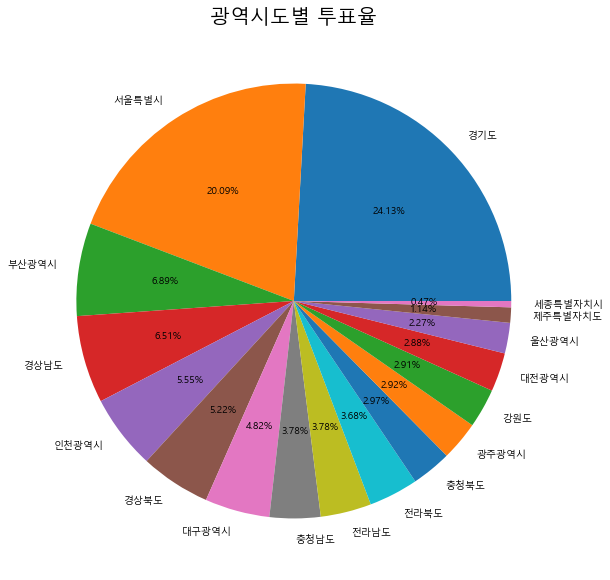

In [104]:
# Pie Chart로 표현하기
plt.rcParams['font.size'] = 10  # font size
plt.rcParams['figure.figsize'] = [15,10]  # chart size

data = elec_sum_order['pop']
categories = list(elec_sum_order.index)

plt.pie(data,
        labels = categories,
        autopct="%0.2f%%",
        startangle = 0
       )
plt.title('광역시도별 투표율', fontsize = 20)
plt.show()

# 문 후보의 광역시도별 득표율

In [105]:
elec_moon_sum = election.pivot_table('moon', index='광역시도', aggfunc=sum)
elec_moon_sum

,moon
광역시도,
강원도,324768
경기도,3319812
경상남도,779731
경상북도,369726
광주광역시,583847
대구광역시,342620
대전광역시,404545
부산광역시,872127
서울특별시,2781345


In [106]:
elec_moon_sum = elec_moon_sum.sort_values(by='moon', ascending=False)
elec_moon_ratio = round((elec_moon_sum['moon'] / elec_moon_sum['moon'].sum())*100,2)
elec_moon_ratio

광역시도
경기도        24.73
서울특별시      20.72
부산광역시       6.50
경상남도        5.81
전라북도        5.80
인천광역시       5.57
전라남도        5.50
광주광역시       4.35
충청남도        3.55
대전광역시       3.01
충청북도        2.79
경상북도        2.75
대구광역시       2.55
강원도         2.42
울산광역시       2.11
제주특별자치도     1.26
세종특별자치시     0.58
Name: moon, dtype: float64

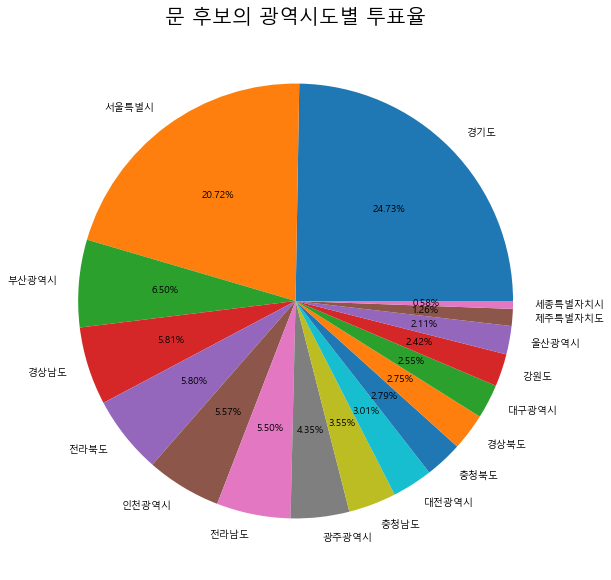

In [107]:
# Pie Chart로 표현하기
plt.rcParams['figure.figsize'] = [15,10]  # chart size

data = elec_moon_ratio
categories = list(elec_moon_ratio.index)

plt.pie(data,
        labels = categories,
        autopct="%0.2f%%",
        startangle = 0
       )
plt.title('문 후보의 광역시도별 투표율', fontsize = 20)
plt.show()

# 문 후보의 서울 득표 Top 5

In [108]:
seoul = election[election.광역시도 == '서울특별시']
seoul

,광역시도,시군,pop,moon,hong,ahn,electionSum,electionRatio
0,서울특별시,종로구,102566,42512,22325,22313,87150,84.97
1,서울특별시,중구,82852,34062,17901,19372,71335,86.10
2,서울특별시,용산구,148157,58081,35230,32109,125420,84.65
3,서울특별시,성동구,203175,86686,40566,45674,172926,85.11
4,서울특별시,광진구,240030,105512,46368,52824,204704,85.28
5,서울특별시,동대문구,236092,98958,51631,53359,203948,86.38
6,서울특별시,중랑구,265706,111450,56545,62778,230773,86.85
7,서울특별시,성북구,295866,129263,57584,66518,253365,85.64
8,서울특별시,강북구,210614,89645,42268,51669,183582,87.17
9,서울특별시,도봉구,229233,94898,47461,55600,197959,86.36


In [109]:
seoul_moon = seoul.sort_values(by='moon', ascending=False)
seoul_moon = seoul_moon[['시군','moon']]
seoul_moon.set_index('시군', inplace = True)
seoul_moon

,moon
시군,
송파구,177328
강서구,175882
관악구,159854
노원구,158167
은평구,140180
양천구,133853
성북구,129263
강남구,128927
강동구,122511


In [110]:
# 득표율 계산
seoul_moon_ratio = round((seoul_moon['moon'] / seoul_moon['moon'].sum())*100,2)
seoul_moon_ratio

# Top5를 제외한 곳을 기타로 설정
seoul_moon_ratio_top = seoul_moon_ratio[0:5].append(pd.Series({'기타':seoul_moon_ratio[5:].sum()}))
seoul_moon_ratio_top


송파구     6.38
강서구     6.32
관악구     5.75
노원구     5.69
은평구     5.04
기타     70.83
dtype: float64

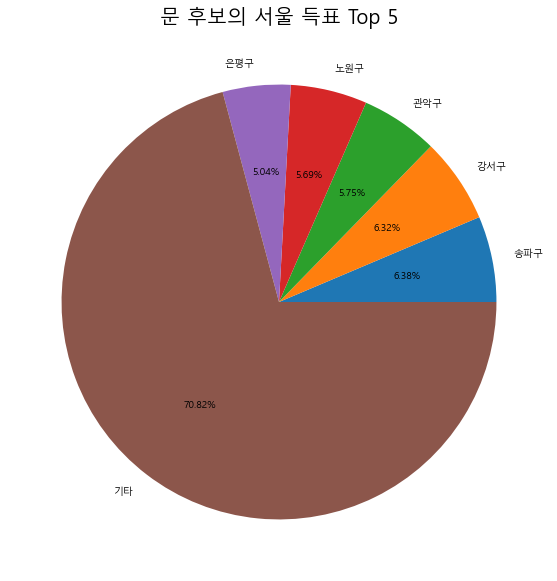

In [111]:
# Pie Chart로 표현하기
plt.rcParams['figure.figsize'] = [15,10]  # chart size

data = seoul_moon_ratio_top
categories = list(seoul_moon_ratio_top.index)

plt.pie(data,
        labels = categories,
        autopct="%0.2f%%",
        startangle = 0
       )
plt.title('문 후보의 서울 득표 Top 5', fontsize = 20)
plt.show()

# 홍 후보의 서울 득표 Top 5

In [112]:
seoul_hong = seoul.sort_values(by='hong', ascending=False)
seoul_hong = seoul_hong[['시군','hong']]
seoul_hong.set_index('시군', inplace = True)
seoul_hong

,hong
시군,
송파구,98549
강남구,97639
강서구,76601
서초구,74891
노원구,67590
강동구,65893
양천구,60814
은평구,60109
관악구,59914


In [113]:
# 득표율 계산
seoul_hong_ratio = round((seoul_hong['hong'] / seoul_hong['hong'].sum())*100,2)
seoul_hong_ratio

# Top5를 제외한 곳을 기타로 설정
seoul_hong_ratio_top = seoul_hong_ratio[0:5].append(pd.Series({'기타':seoul_hong_ratio[5:].sum()}))
seoul_hong_ratio_top


송파구     7.22
강남구     7.15
강서구     5.61
서초구     5.49
노원구     4.95
기타     69.61
dtype: float64

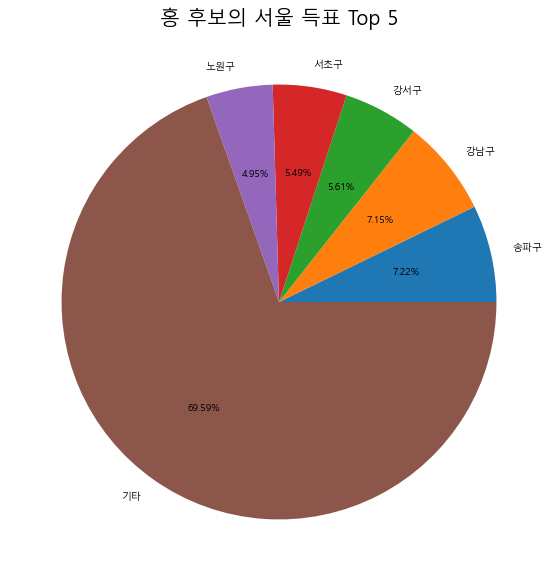

In [114]:
# Pie Chart로 표현하기
plt.rcParams['figure.figsize'] = [15,10]  # chart size

data = seoul_hong_ratio_top
categories = list(seoul_hong_ratio_top.index)

plt.pie(data,
        labels = categories,
        autopct="%0.2f%%",
        startangle = 0
       )
plt.title('홍 후보의 서울 득표 Top 5', fontsize = 20)
plt.show()

# 대선주자 출생지별 득표율

## 문후보 : 거제시

In [115]:
geoje = election[election.시군 == '거제시'] 
geoje

,광역시도,시군,pop,moon,hong,ahn,electionSum,electionRatio
237,경상남도,거제시,150230,68291,38775,20359,127425,84.82


In [116]:
# 득표율 계산
geoje_moon = round((geoje['moon'] / geoje['pop'])*100,2)
geoje_hong = round((geoje['hong'] / geoje['pop'])*100,2)
geoje_ahn = round((geoje['ahn'] / geoje['pop'])*100,2)
geoje_etc = round(((geoje['pop']-geoje['electionSum']) / geoje['pop'])*100,2)
geoje_etc

237    15.18
dtype: float64

In [117]:
geoje_moon = pd.Series({'문재인' : geoje_moon,
           '홍준표' : geoje_hong,
           '안철수' : geoje_ahn,
           '기타' : geoje_etc,
          })
geoje_moon

문재인    237    45.46
dtype: float64
홍준표    237    25.81
dtype: float64
안철수    237    13.55
dtype: float64
기타     237    15.18
dtype: float64
dtype: object

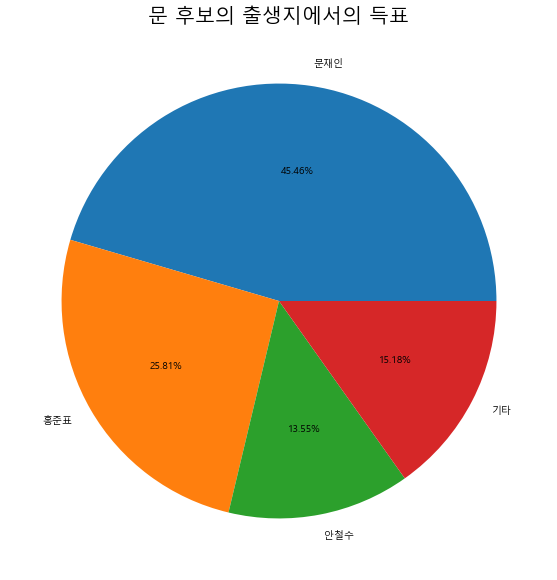

In [118]:
# Pie Chart로 표현하기
plt.rcParams['figure.figsize'] = [15,10]  # chart size

data = geoje_moon
categories = list(geoje_moon.index)

plt.pie(data,
        labels = categories,
        autopct="%0.2f%%",
        startangle = 0
       )
plt.title('문 후보의 출생지에서의 득표', fontsize = 20)
plt.show()

## 홍후보 : 창녕군

In [119]:
chang = election[election.시군 == '창녕군'] 
chang

,광역시도,시군,pop,moon,hong,ahn,electionSum,electionRatio
240,경상남도,창녕군,42878,10310,24464,3877,38651,90.14


In [120]:
# 득표율 계산
chang_moon = round((chang['moon'] / chang['pop'])*100,2)
chang_hong = round((chang['hong'] / chang['pop'])*100,2)
chang_ahn = round((chang['ahn'] / chang['pop'])*100,2)
chang_etc = round(((chang['pop']-chang['electionSum']) / chang['pop'])*100,2)
chang_etc

240    9.86
dtype: float64

In [121]:
chang_hong = pd.Series({'문재인' : chang_moon,
           '홍준표' : chang_hong,
           '안철수' : chang_ahn,
           '기타' : chang_etc,
          })
chang_hong

문재인    240    24.04
dtype: float64
홍준표    240    57.05
dtype: float64
안철수     240    9.04
dtype: float64
기타      240    9.86
dtype: float64
dtype: object

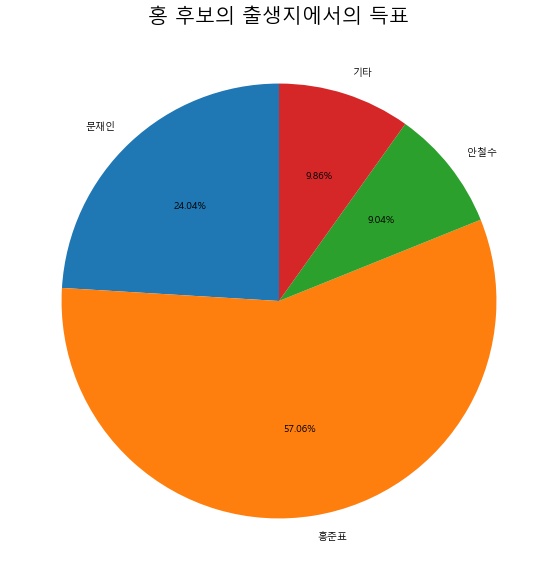

In [122]:
# Pie Chart로 표현하기
plt.rcParams['figure.figsize'] = [15,10]  # chart size

data = chang_hong
categories = list(chang_hong.index)

plt.pie(data,
        labels = categories,
        autopct="%0.2f%%",
        startangle = 90
       )
plt.title('홍 후보의 출생지에서의 득표', fontsize = 20)
plt.show()

## 안후보 : 부산광역시

In [123]:
busan = election[election.광역시도 == '부산광역시'] 
busan = busan.pivot_table(['pop','moon','hong','ahn','electionSum'],index='광역시도', aggfunc=sum)

In [124]:
# 득표율 계산
busan_moon = round((busan['moon'] / busan['pop'])*100,2)
busan_hong = round((busan['hong'] / busan['pop'])*100,2)
busan_ahn = round((busan['ahn'] / busan['pop'])*100,2)
busan_etc = round(((busan['pop']-busan['electionSum']) / busan['pop'])*100,2)
busan_etc

광역시도
부산광역시    12.83
dtype: float64

In [125]:
busan_ahn = pd.Series({'문재인' : busan_moon,
           '홍준표' : busan_hong,
           '안철수' : busan_ahn,
           '기타' : busan_etc,
          })
busan_ahn

문재인    광역시도
부산광역시    38.56
dtype: float64
홍준표    광역시도
부산광역시    31.86
dtype: float64
안철수    광역시도
부산광역시    16.75
dtype: float64
기타     광역시도
부산광역시    12.83
dtype: float64
dtype: object

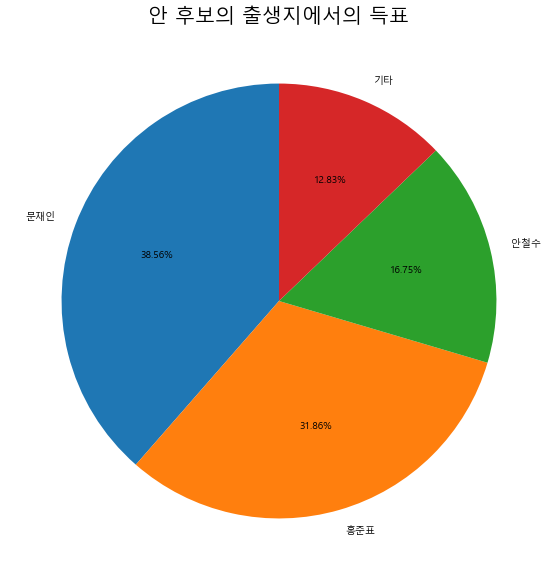

In [126]:
# Pie Chart로 표현하기
plt.rcParams['figure.figsize'] = [15,10]  # chart size

data = busan_ahn
categories = list(busan_ahn.index)

plt.pie(data,
        labels = categories,
        autopct="%0.2f%%",
        startangle = 90
       )
plt.title('안 후보의 출생지에서의 득표', fontsize = 20)
plt.show()

# 투표수가 가장 많은 4지역(광역시도)의 각 후보별 득표수를 막대그래프로 표현하기

In [127]:
elec_top4 = election.pivot_table(['pop','moon','hong','ahn'], index= '광역시도', aggfunc=sum)

In [128]:
elec_top4 = elec_top4.sort_values(by='pop', ascending=False)[0:4]
elec_top4 = elec_top4.loc[:,['moon','hong','ahn']]
elec_top4

,moon,hong,ahn
광역시도,,,
경기도,3319812,1637345,1807308
서울특별시,2781345,1365285,1492767
부산광역시,872127,720484,378907
경상남도,779731,790491,284272


In [129]:
elec_top4.columns=['문재인','홍준표','안철수']
elec_top4

,문재인,홍준표,안철수
광역시도,,,
경기도,3319812,1637345,1807308
서울특별시,2781345,1365285,1492767
부산광역시,872127,720484,378907
경상남도,779731,790491,284272


Text(0.5, 0, '광역시도')

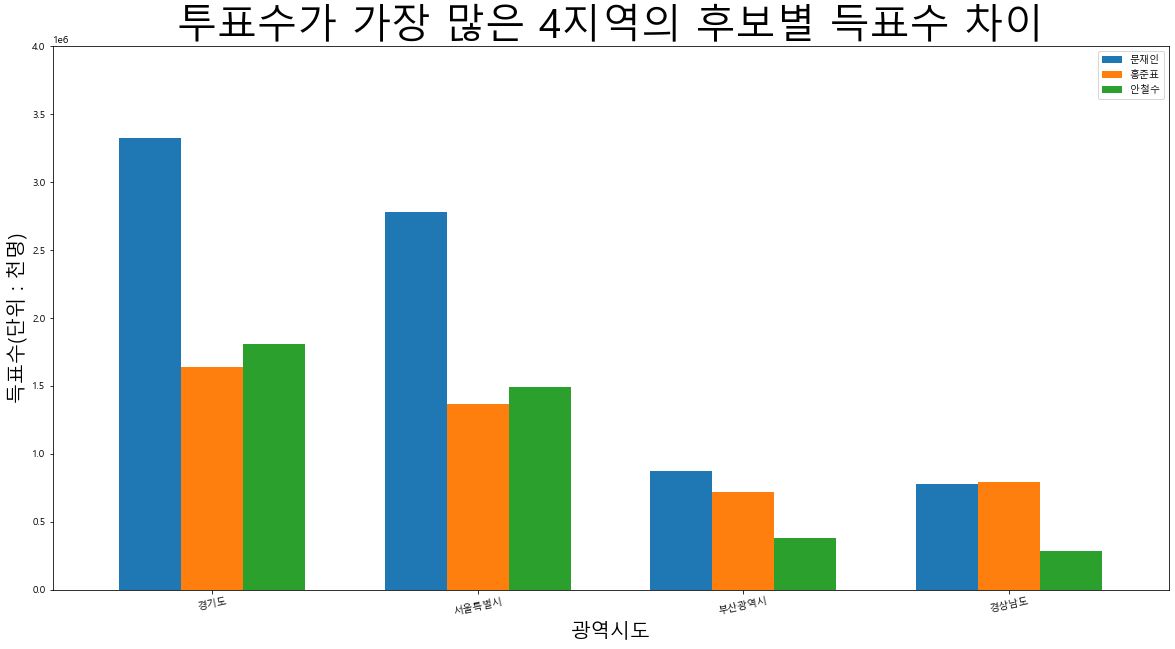

In [130]:
# 막대그래프로 표현하기
elec_top4.plot(kind = 'bar',
               figsize = (20,10),
               width = 0.7,
               ylim = (0,4000000),
               rot = 12,
               
)
plt.title('투표수가 가장 많은 4지역의 후보별 득표수 차이', fontsize = 40)
plt.ylabel('득표수(단위 : 천명)',fontsize = 20)
plt.xlabel('광역시도', fontsize = 20)

# 투표수가 가장 높은 5개의 시군구의 후보별 득표수

In [131]:
elec_top5 = election.pivot_table(['pop','moon','hong','ahn'], index= '시군', aggfunc=sum)
elec_top5 = elec_top5.sort_values(by='pop', ascending=False)
elec_top5 = elec_top5.iloc[5:,0:3]
elec_top5 = elec_top5.head(5)
elec_top5

,ahn,hong,moon
시군,,,
부천시,128297,100544,239697
강서구,98757,95312,206665
송파구,99018,98549,177328
남양주시,92048,86026,165079
화성시,84967,69014,176940


In [132]:
elec_top5.columns = ['안철수','홍준표','문재인']
elec_top5.rename(index={'부천시':'경기도 부천시',
                        '강서구':'서울특별시 강서구',
                        '송파구':'서울특별시 송파구',
                        '남양주시':'경기도 남양주시',
                        '화성시':'경기도 화성시',
                       }, inplace=True)

Text(0.5, 0, '시군')

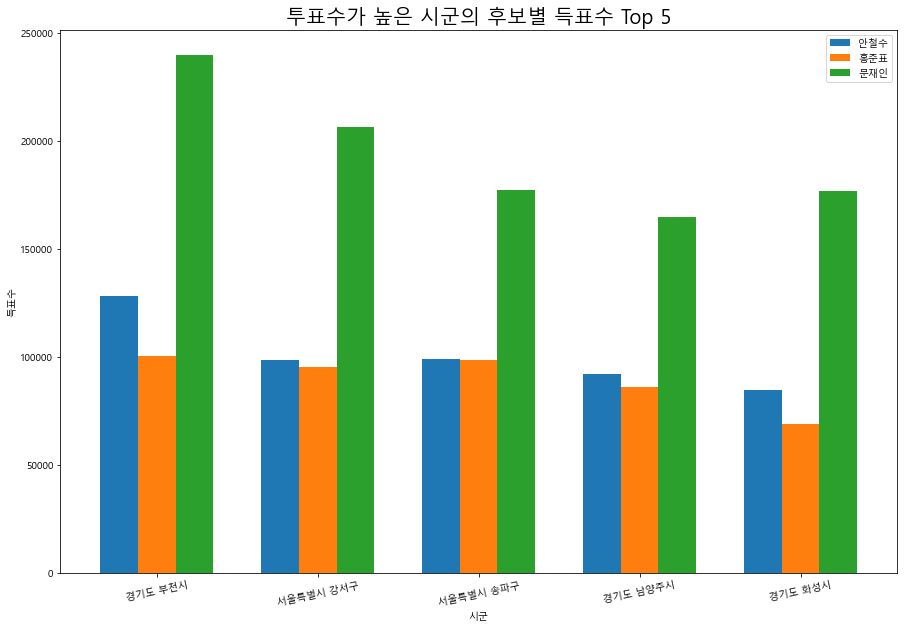

In [133]:
# 막대그래프로 표현하기
elec_top5.plot(kind = 'bar',
               figsize = (15,10),
               width = 0.7,
               rot = 12,
               
)
plt.title('투표수가 높은 시군의 후보별 득표수 Top 5', fontsize = 20)
plt.ylabel('득표수',fontsize = 10)
plt.xlabel('시군', fontsize = 10)